In [1]:
from math import log
import random
import numpy as np
import cvxpy as cp
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['font.size'] = 14.0
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams.update({'mathtext.default': 'regular' })

### Create problem

In [3]:
def create_gaussian_prob(m, n, seed=42):
    np.random.seed(seed)
    random.seed(seed)

    A = np.random.randn(m, n)
    b = np.random.randn(m)
    
    return A, b


def create_uniform_prob(m, n, seed=42):
    np.random.seed(seed)
    random.seed(seed)

    A = np.random.uniform(low=-1.0, high=1.0, size=(m, n))
    b = np.random.uniform(low=-1.0, high=1.0, size=m)
    
    return A, b

### Function f

In [4]:
def sgn(x):
    return np.where(x < 0, -1, 1)

In [5]:
def f(x, A, b):
    return np.linalg.norm(A @ x - b, 1)

In [6]:
def subgrad_f(x, A, b):
    return A.T @ sgn(A @ x - b)

### Subgrad descent

In [7]:
def subgrad_descent(A, b, stepsize, f_opt, max_k=100, c=None):
    
    n = A.shape[1]
    x = np.zeros(n)
    
    differences = []
    
    if c:
        k = 0
        f_curr = f(x, A, b)
        
        f_min = f_curr
        
        while f_curr > c * f_opt :
        
            g = subgrad_f(x, A, b)

            if stepsize == 'dynamic':
                t = 1 / (np.linalg.norm(g) * sqrt(k+1))
            if stepsize == 'polyak':
                t = ( f(x, A, b) - f_opt ) / np.linalg.norm(g)**2

            x = x - t * g

            f_curr = f(x, A, b)
            
            f_min = min(f_curr, f_min)

            differences.append(f_min - f_opt)
            
            k += 1
    else:
        
        f_curr = f(x, A, b)
        
        f_min = f_curr

        for k in range(max_k):

            g = subgrad_f(x, A, b)

            if stepsize == 'dynamic':
                t = 1 / (np.linalg.norm(g) * sqrt(k+1))
            if stepsize == 'polyak':
                t = ( f(x, A, b) - f_opt ) / np.linalg.norm(g)**2

            x = x - t * g

            f_curr = f(x, A, b)

            f_min = min(f_curr, f_min)

            differences.append(f_min - f_opt)
            
            k += 1
    
    return differences

### CVX Soltuion

In [8]:
def cvx_sol(A, b):
    x = cp.Variable(A.shape[1])
    
    prob = cp.Problem(
        cp.Minimize(
            cp.norm1(A @ x - b)
        )
    )
    result = prob.solve()
    
    return x.value, prob.value

### Q2

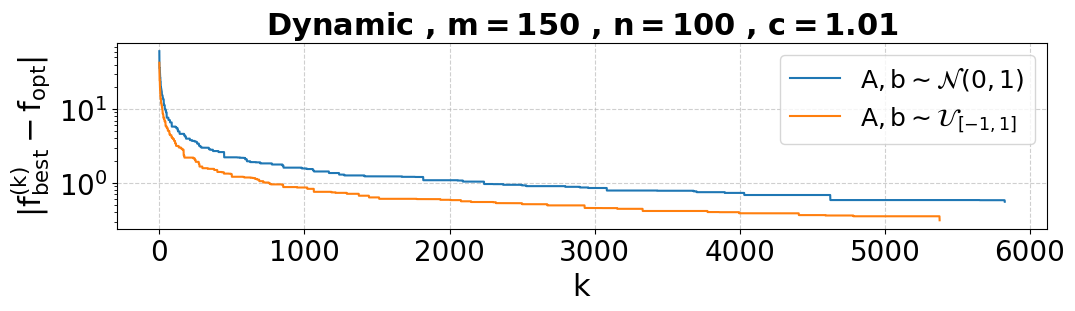

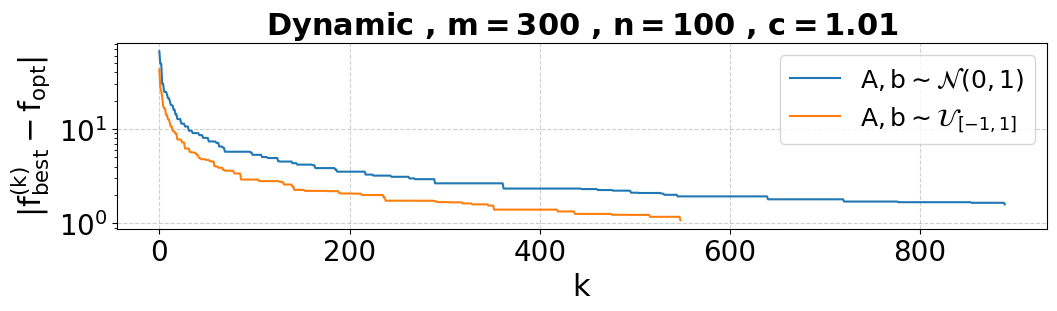

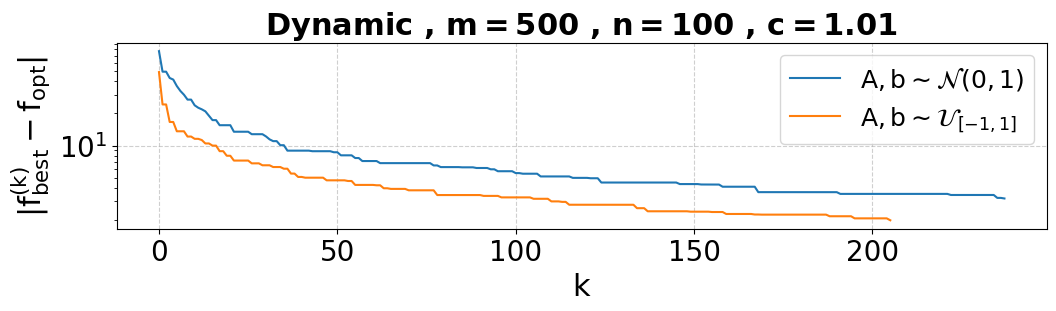

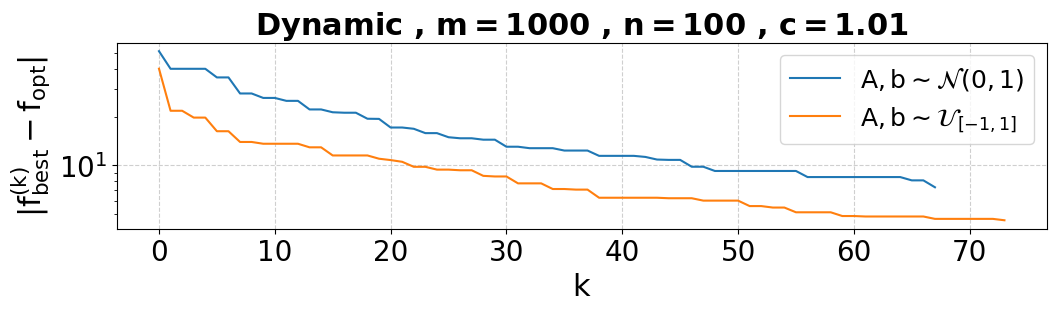

In [9]:
m, n = 300, 100
c = 1.01

#for m, n in [[100, 100], [300, 100], [700, 100]]:
for m, n in [[150, 100], [300, 100], [500, 100], [1000, 100]]:

    A_n, b_n = create_gaussian_prob(m, n)
    A_u, b_u = create_uniform_prob(m, n)

    x_star_n, f_opt_n = cvx_sol(A_n, b_n)
    x_star_u, f_opt_u = cvx_sol(A_u, b_u)

    dynamic_diffs_n = subgrad_descent(A_n, b_n, 'dynamic', f_opt_n, c=c)
    dynamic_diffs_u = subgrad_descent(A_u, b_u, 'dynamic', f_opt_u, c=c)
    #polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)

    pdf = PdfPages(f'plots/2.5_dynamic_{m}_{n}.pdf')
    plt.figure(figsize=(12, 3))

    plt.plot(range(len(dynamic_diffs_n)), dynamic_diffs_n, label='$A, b \\sim \\mathcal{N}(0, 1)$')#, marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs_u)), dynamic_diffs_u, label='$A, b \\sim \\mathcal{U}_{[-1, 1]}$')#, marker='^', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend()

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f^{(k)}_{best} - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    plt.title(f"Dynamic , $m = {m}$ , $n = {n}$ , $c = {c}$")

    plt.subplots_adjust(bottom=0.23, top=0.85)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

### Q3

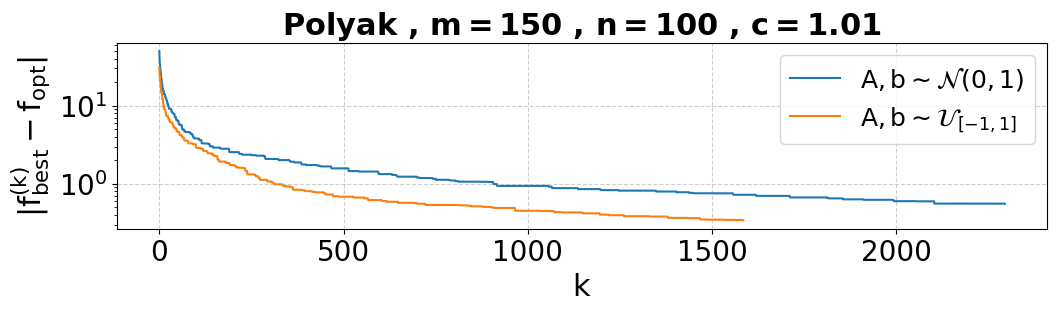

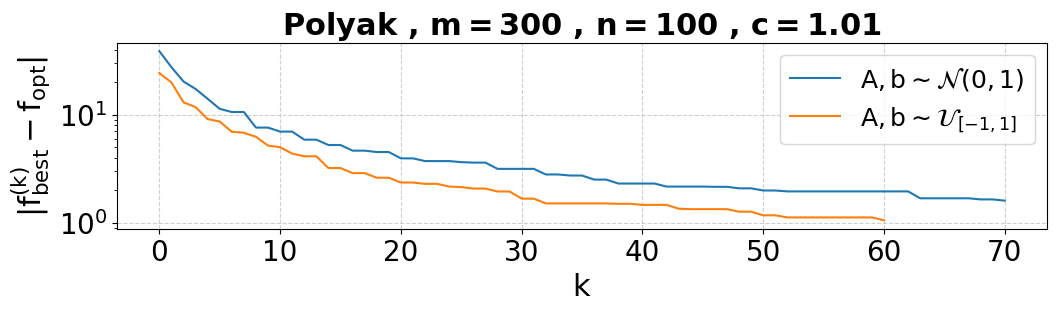

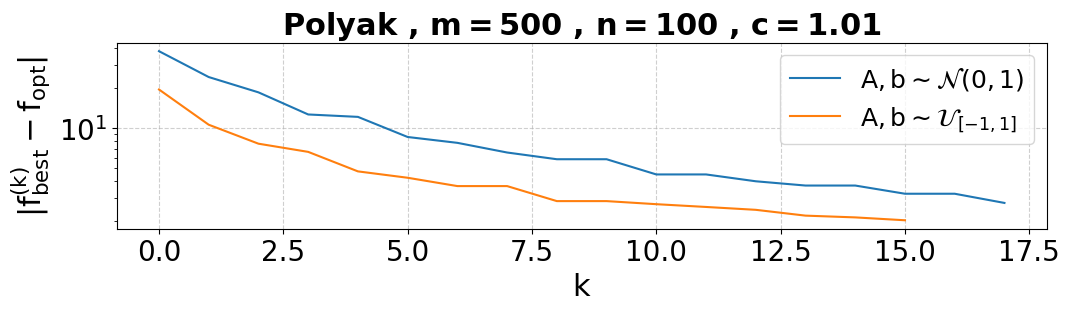

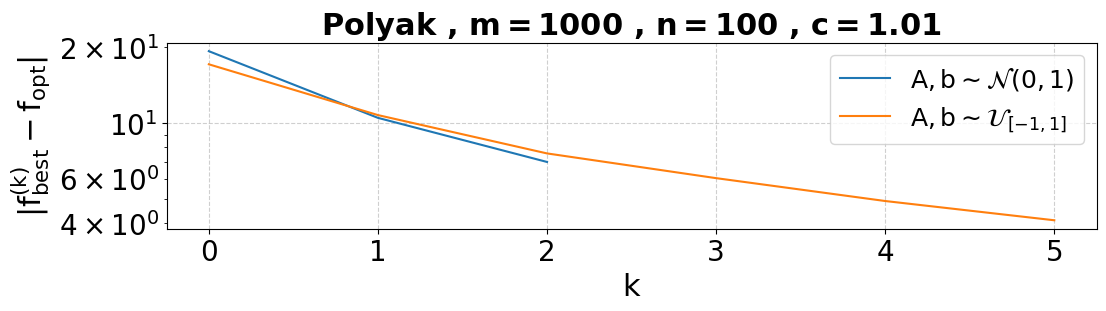

In [10]:
m, n = 300, 100
c = 1.01

#for m, n in [[100, 100], [300, 100], [700, 100]]:
for m, n in [[150, 100], [300, 100], [500, 100], [1000, 100]]:

    A_n, b_n = create_gaussian_prob(m, n)
    A_u, b_u = create_uniform_prob(m, n)

    x_star_n, f_opt_n = cvx_sol(A_n, b_n)
    x_star_u, f_opt_u = cvx_sol(A_u, b_u)

    polyak_diffs_n = subgrad_descent(A_n, b_n, 'polyak', f_opt_n, c=c)
    polyak_diffs_u = subgrad_descent(A_u, b_u, 'polyak', f_opt_u, c=c)
    #polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)

    pdf = PdfPages(f'plots/2.5_polyak_{m}_{n}.pdf')
    plt.figure(figsize=(12, 3))

    plt.plot(range(len(polyak_diffs_n)), polyak_diffs_n, label='$A, b \\sim \\mathcal{N}(0, 1)$')#, marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(polyak_diffs_u)), polyak_diffs_u, label='$A, b \\sim \\mathcal{U}_{[-1, 1]}$')#, marker='^', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend()

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f^{(k)}_{best} - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    plt.title(f"Polyak , $m = {m}$ , $n = {n}$ , $c = {c}$")

    plt.subplots_adjust(bottom=0.23, top=0.85)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

### Q4

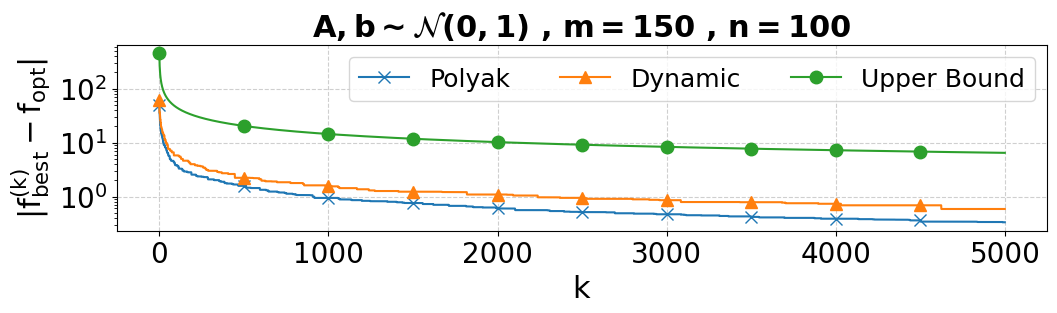

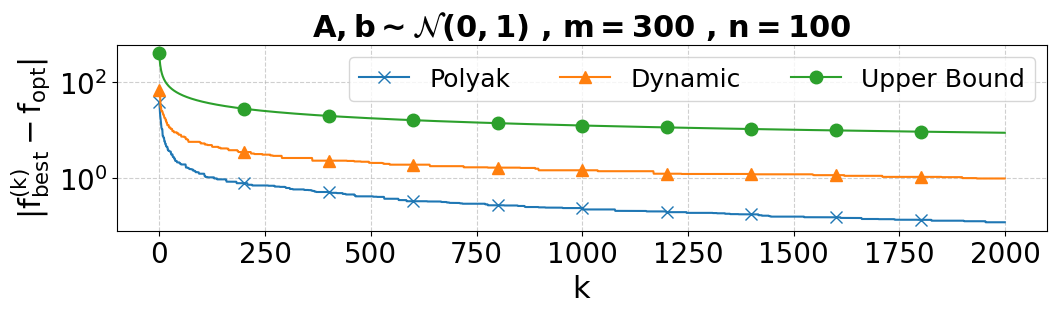

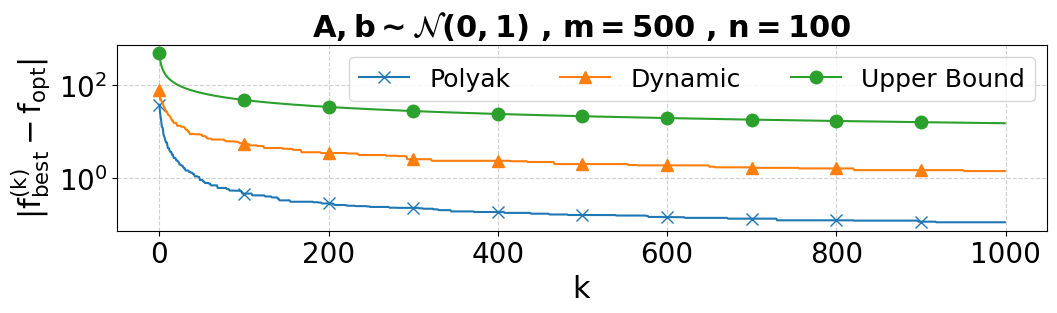

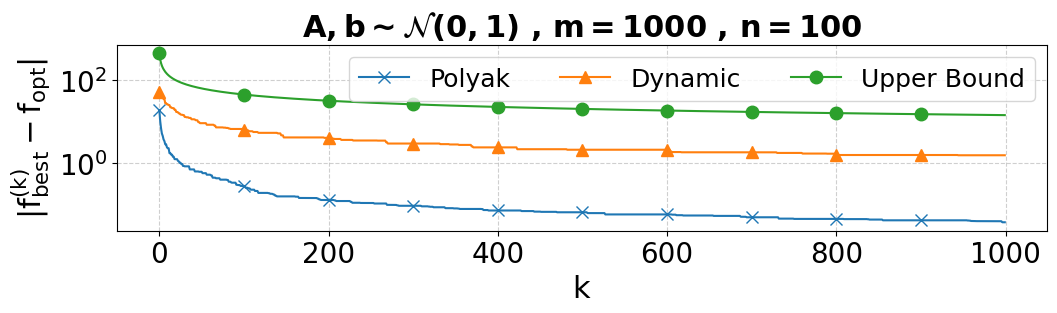

In [11]:
m, n = 300, 100
max_k = 100

#for m, n in [[100, 100], [300, 100], [700, 100]]:
for m, n, max_k in [[150, 100, 5000], [300, 100, 2000], [500, 100, 1000], [1000, 100, 1000]]:

    A, b = create_gaussian_prob(m, n)

    x_star, f_opt = cvx_sol(A, b)
    
    L_f = sqrt( m * max(np.linalg.eigvals(A.T @ A)))
    dist = np.linalg.norm(np.zeros(n) - x_star)
    bound = L_f * dist / np.sqrt(np.arange(max_k) + 1)

    dynamic_diffs = subgrad_descent(A, b, 'dynamic', f_opt, max_k=max_k)
    polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)
    #polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)

    pdf = PdfPages(f'plots/2.5_vs_N_{m}_{n}.pdf')
    plt.figure(figsize=(12, 3))

    markevery=len(polyak_diffs)//10
    plt.plot(range(len(polyak_diffs)), polyak_diffs, label='Polyak', marker='x', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), dynamic_diffs, label='Dynamic', marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), bound, label='Upper Bound', marker='o', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend(ncols=3)

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f^{(k)}_{best} - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    d = '$A, b \\sim \\mathcal{N}(0, 1)$'
    plt.title(f"{d} , $m = {m}$ , $n = {n}$")

    plt.subplots_adjust(bottom=0.23, top=0.85)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

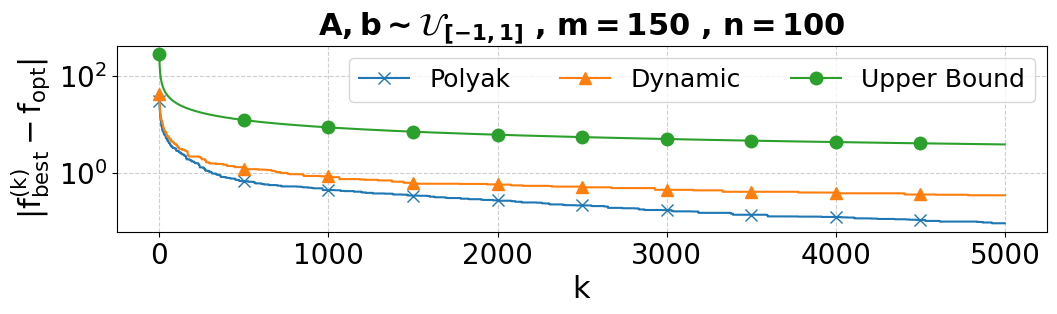

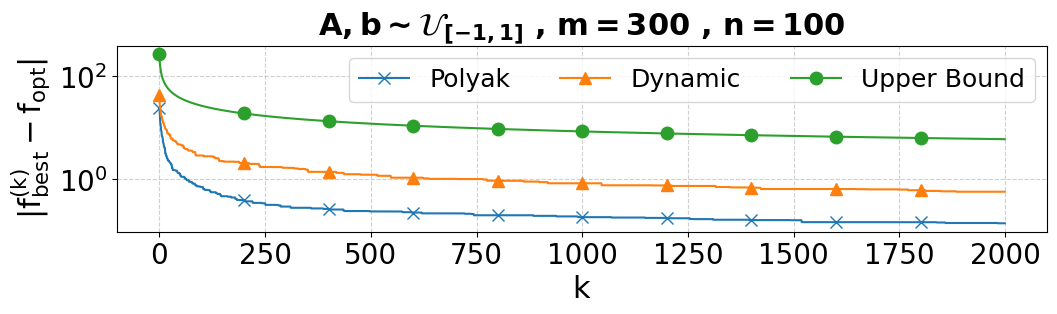

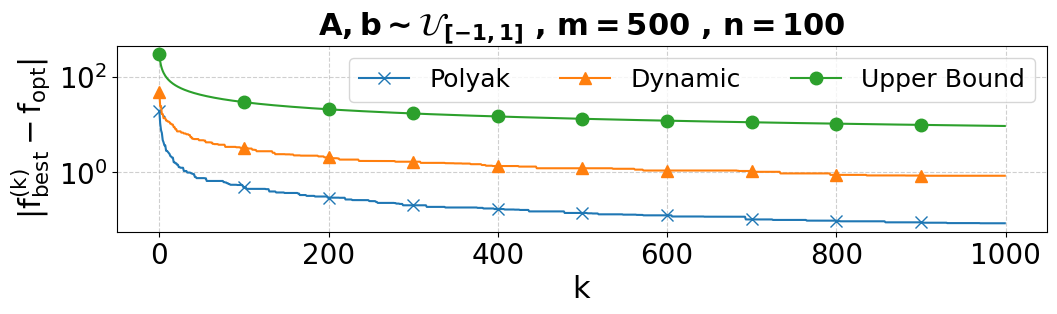

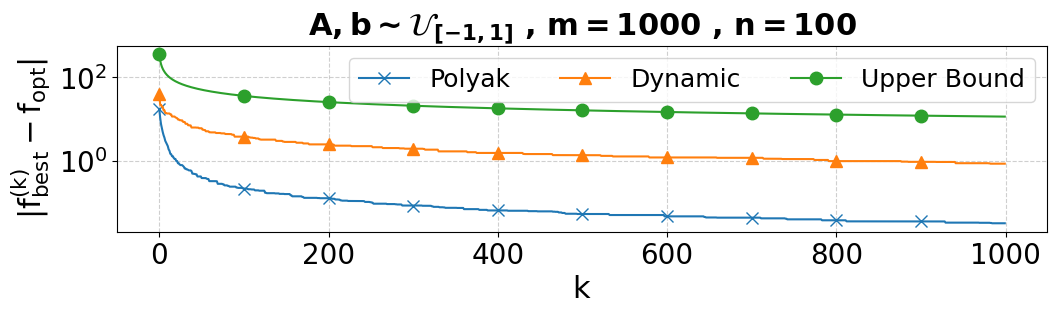

In [12]:
#for m, n in [[100, 100], [300, 100], [700, 100]]:
for m, n, max_k in [[150, 100, 5000], [300, 100, 2000], [500, 100, 1000], [1000, 100, 1000]]:

    A, b = create_uniform_prob(m, n)

    x_star, f_opt = cvx_sol(A, b)
    
    L_f = sqrt( m * max(np.linalg.eigvals(A.T @ A)))
    dist = np.linalg.norm(np.zeros(n) - x_star)
    bound = L_f * dist / np.sqrt(np.arange(max_k) + 1)

    dynamic_diffs = subgrad_descent(A, b, 'dynamic', f_opt, max_k=max_k)
    polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)
    #polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)

    pdf = PdfPages(f'plots/2.5_vs_U_{m}_{n}.pdf')
    plt.figure(figsize=(12, 3))

    markevery=len(polyak_diffs)//10
    plt.plot(range(len(polyak_diffs)), polyak_diffs, label='Polyak', marker='x', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), dynamic_diffs, label='Dynamic', marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), bound, label='Upper Bound', marker='o', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend(ncols=3)

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f^{(k)}_{best} - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    d = '$A, b \\sim \\mathcal{U}_{[-1, 1]}$'
    plt.title(f"{d} , $m = {m}$ , $n = {n}$")

    plt.subplots_adjust(bottom=0.23, top=0.85)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

### Q6 - Q7

In [13]:
def subgrad_f_i(x, a, b):
    return a * sgn(np.dot(a, x) - b)

In [14]:
def stochastic_incremental(A, b, f_opt, mode='stochastic', E=100, batch_size=1):
    
    n = A.shape[1]
    m = A.shape[0]
    x = np.zeros(n)
    
    differences = []
    losses = []
    
    L_f = sqrt( m * sum(np.linalg.norm(A[i,:])**2 for i in range(m)) )
    
    f_curr = f(x, A, b)

    for k in range(E):
        
        for s in range(m // batch_size):
            
            grads = []
            
            for j in range(batch_size):

                if mode == 'incremental':
                    i = s * batch_size + j
                if mode == 'stochastic':
                    i = np.random.randint(0, m)

                a_i, b_i = A[i,:], b[i]

                g = subgrad_f_i(x, a_i, b_i)
                
                grads.append(g)
            
            t = 1 / (np.linalg.norm(g) * sqrt(k*s+s+batch_size))
            
            g = np.mean(grads, axis=0)

            x = x - t * g

        f_curr = f(x, A, b)

        losses.append(f_curr)
        differences.append(f_curr - f_opt)
    
    return losses, differences

### Batch size investigation

In [15]:
m, n = 500, 100
max_k = 5000
batch_sizes = [1, 2, 10, 25, 50, 100, 125, 250]

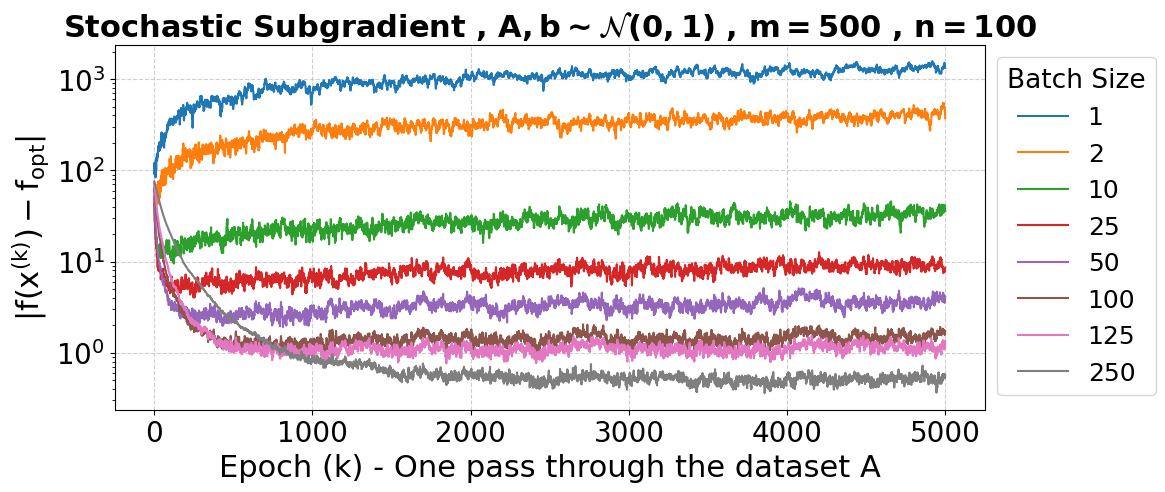

In [16]:
pdf = PdfPages(f'plots/2.5_stochastic_bs.pdf')
plt.figure(figsize=(12, 5))

for batch_size in batch_sizes:

    A, b = create_gaussian_prob(m, n)

    x_star, f_opt = cvx_sol(A, b)

    #dynamic_diffs = subgrad_descent(A, b, 'dynamic', f_opt, max_k=max_k)
    stochastic_losses, stochastic_diffs = stochastic_incremental(A, b, f_opt, mode=f'stochastic', E=max_k, batch_size=batch_size)
    #incremental_losses, stochastic_diffs = stochastic_incremental(A, b, f_opt, mode=f'incremental', E=max_k, batch_size=batch_size)

    markevery=len(stochastic_diffs)//10
    plt.plot(range(len(stochastic_diffs)), stochastic_diffs, label=f'{batch_size}', ms=9, markevery=markevery)
    #plt.plot(range(len(incremental_losses)), incremental_losses, label=f'{batch_size}', ms=9, markevery=markevery)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Batch Size', title_fontsize=19, bbox_to_anchor=(1., 1.))

# Label the axes
plt.xlabel('Epoch (k) - One pass through the dataset A')
plt.ylabel('$|f(x^{(k)}) - f_{opt}|$')

#plt.xscale('log')
plt.yscale('log')

d = '$A, b \\sim \\mathcal{N}(0, 1)$'
plt.title(f"Stochastic Subgradient , {d} , $m = {m}$ , $n = {n}$")

plt.subplots_adjust(bottom=0.15, right=0.85)

pdf.savefig(plt.gcf()) # Save the current figure
plt.show()
plt.close()
pdf.close()

### Stochastic vs. Incrimental

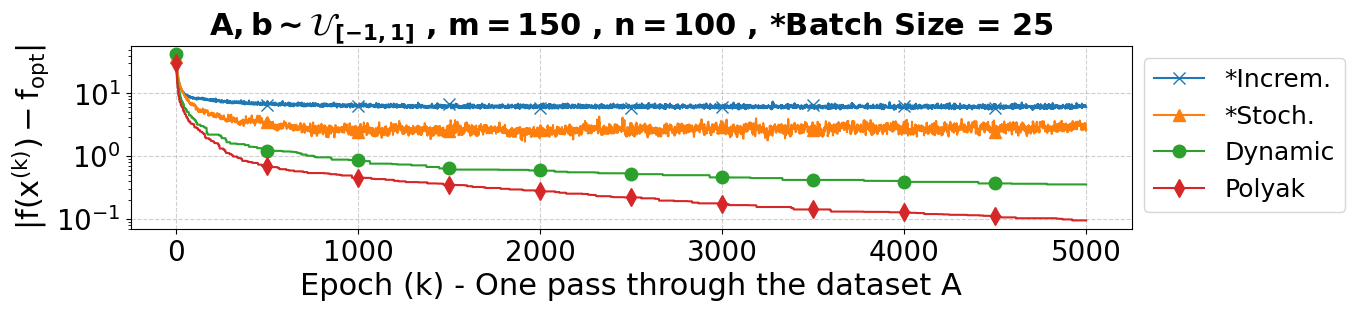

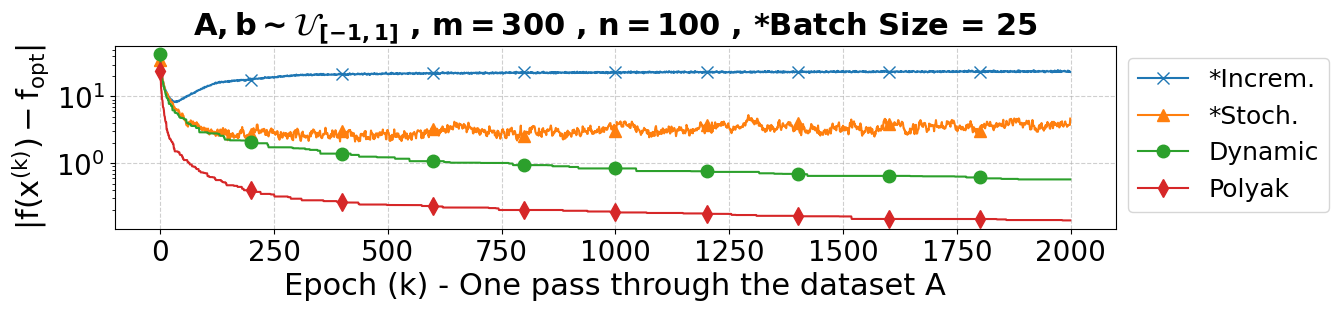

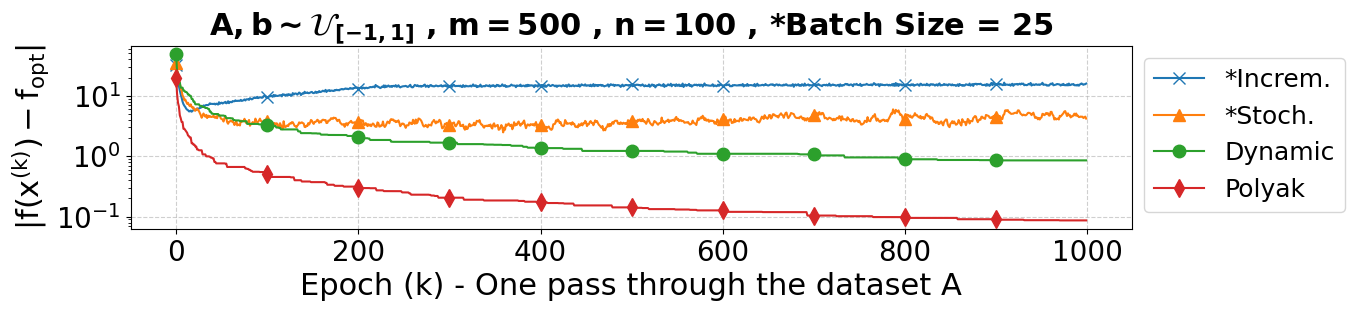

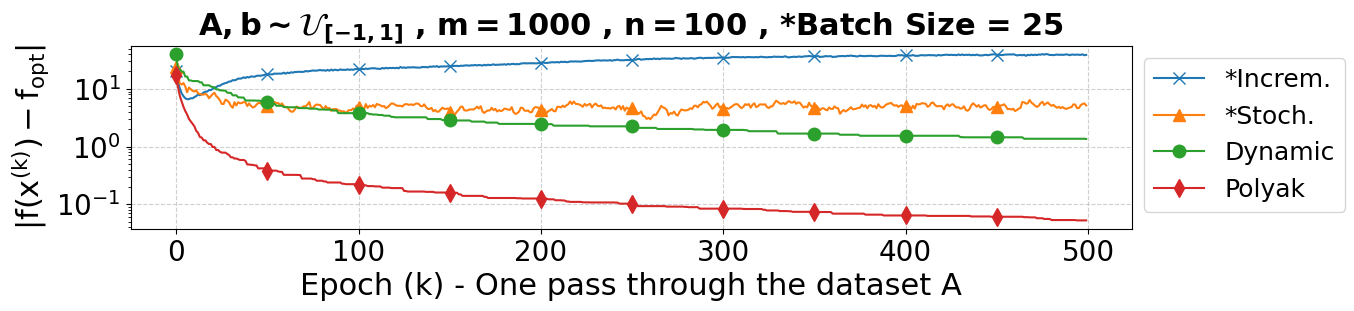

In [20]:
batch_size = 25

for m, n, max_k in [[150, 100, 5000], [300, 100, 2000], [500, 100, 1000], [1000, 100, 500]]:

    A, b = create_uniform_prob(m, n)

    x_star, f_opt = cvx_sol(A, b)

    incremental_losses, incremental_diffs = stochastic_incremental(A, b, f_opt, mode=f'incremental', E=max_k, batch_size=batch_size)
    stochastic_losses, stochastic_diffs = stochastic_incremental(A, b, f_opt, mode=f'stochastic', E=max_k, batch_size=batch_size)
    
    dynamic_diffs = subgrad_descent(A, b, 'dynamic', f_opt, max_k=max_k)
    polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)
    

    pdf = PdfPages(f'plots/2.5_ALL_VS_U_{n}_{m}.pdf')
    plt.figure(figsize=(14, 3))

    markevery=len(incremental_losses)//10
    plt.plot(range(len(incremental_diffs)), incremental_diffs, label='*Increm.', marker='x', ms=9, markevery=markevery)
    plt.plot(range(len(stochastic_diffs)), stochastic_diffs, label='*Stoch.', marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), dynamic_diffs, label='Dynamic', marker='o', ms=9, markevery=markevery)
    plt.plot(range(len(polyak_diffs)), polyak_diffs, label='Polyak', marker='d', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend(bbox_to_anchor=(1., 1.))
    

    # Label the axes
    plt.xlabel('Epoch (k) - One pass through the dataset A')
    plt.ylabel('$|f(x^{(k)}) - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    d = '$A, b \\sim \\mathcal{U}_{[-1, 1]}$'
    plt.title(f"{d} , $m = {m}$ , $n = {n}$ , *Batch Size = {batch_size}")

    plt.subplots_adjust(bottom=0.24, top=0.85, right=0.84)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

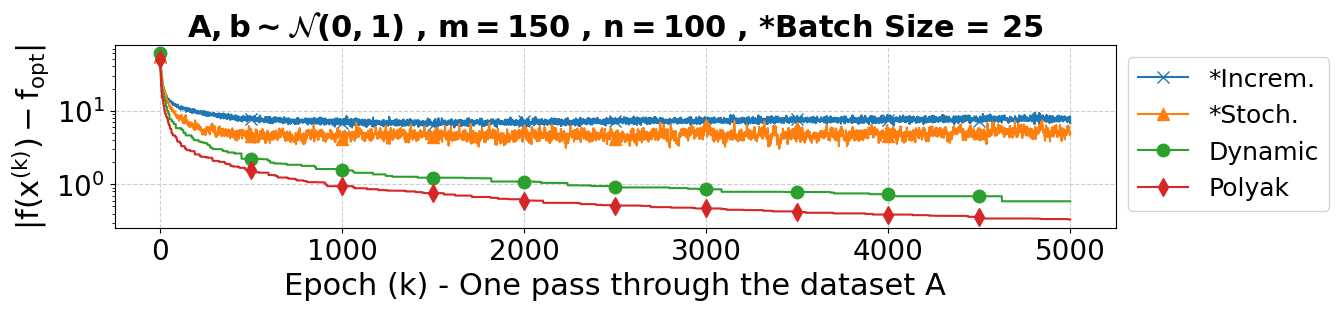

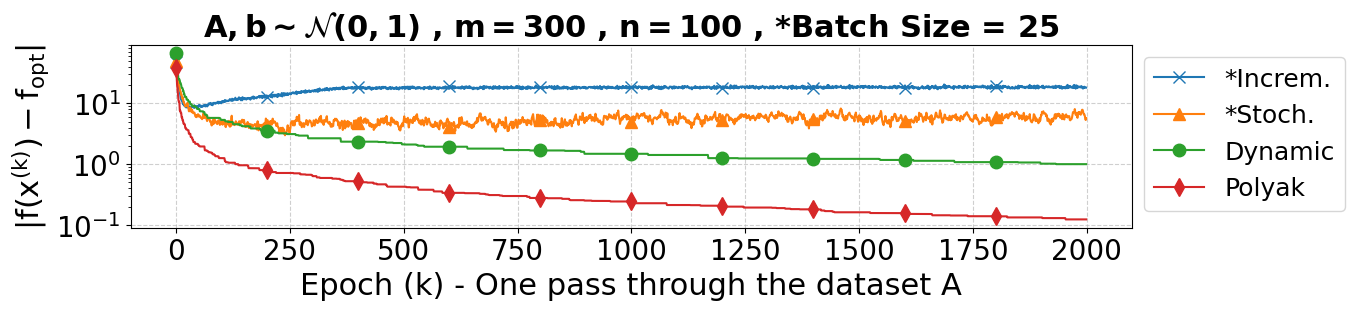

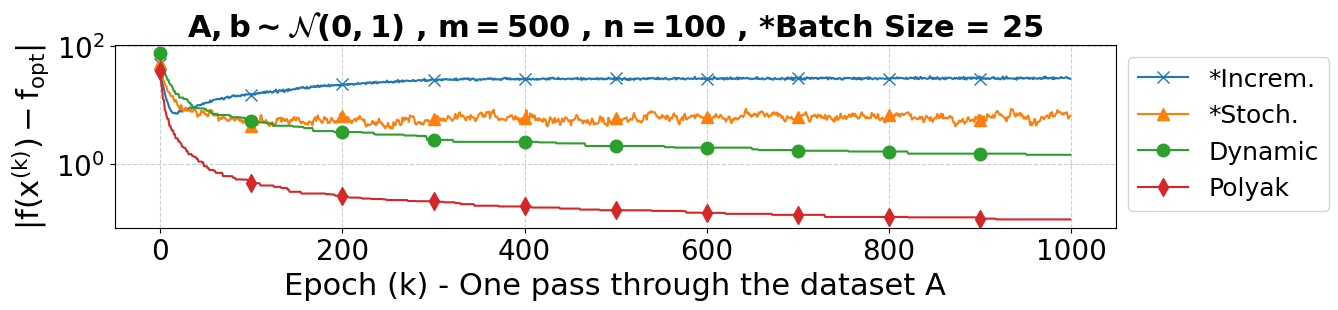

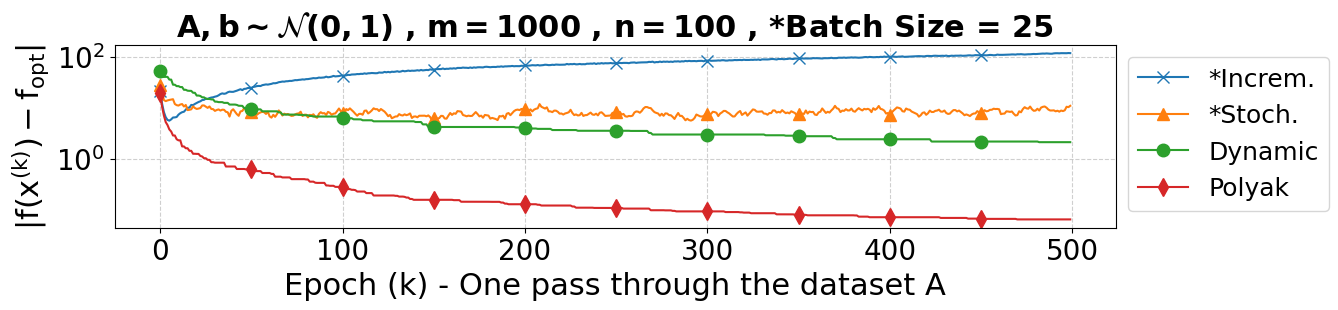

In [21]:
#for m, n in [[100, 100], [300, 100], [700, 100]]:
batch_size = 25

for m, n, max_k in [[150, 100, 5000], [300, 100, 2000], [500, 100, 1000], [1000, 100, 500]]:

    A, b = create_gaussian_prob(m, n)

    x_star, f_opt = cvx_sol(A, b)

    incremental_losses, incremental_diffs = stochastic_incremental(A, b, f_opt, mode=f'incremental', E=max_k, batch_size=batch_size)
    stochastic_losses, stochastic_diffs = stochastic_incremental(A, b, f_opt, mode=f'stochastic', E=max_k, batch_size=batch_size)
    
    dynamic_diffs = subgrad_descent(A, b, 'dynamic', f_opt, max_k=max_k)
    polyak_diffs = subgrad_descent(A, b, 'polyak', f_opt, max_k=max_k)
    

    pdf = PdfPages(f'plots/2.5_ALL_VS_N_{n}_{m}.pdf')
    plt.figure(figsize=(14, 3))

    markevery=len(incremental_losses)//10
    plt.plot(range(len(incremental_diffs)), incremental_diffs, label='*Increm.', marker='x', ms=9, markevery=markevery)
    plt.plot(range(len(stochastic_diffs)), stochastic_diffs, label='*Stoch.', marker='^', ms=9, markevery=markevery)
    plt.plot(range(len(dynamic_diffs)), dynamic_diffs, label='Dynamic', marker='o', ms=9, markevery=markevery)
    plt.plot(range(len(polyak_diffs)), polyak_diffs, label='Polyak', marker='d', ms=9, markevery=markevery)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.legend(bbox_to_anchor=(1., 1.))

    # Label the axes
    plt.xlabel('Epoch (k) - One pass through the dataset A')
    plt.ylabel('$|f(x^{(k)}) - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    d = '$A, b \\sim \\mathcal{N}(0, 1)$'
    plt.title(f"{d} , $m = {m}$ , $n = {n}$ , *Batch Size = {batch_size}")

    plt.subplots_adjust(bottom=0.24, top=0.85, right=0.84)

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()